In [1]:
# import basic modules
import os, pysam
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sn

# define reference fasta filepath
reference_filepath = "/lustre/bio_running/DNA_Ribo/refs/ref.fa"

In [2]:
# visualize collapsed merged eventalign tables
results_directory="/lustre/bio_running/DNA_Ribo_2023/results/currents_features_with_raw_data"
glob(os.path.join(results_directory, "*1b*tsv"))

['/lustre/bio_running/DNA_Ribo_2023/results/currents_features_with_raw_data/dna_vs_ribo1b_dwell_times_stats.forward.tsv',
 '/lustre/bio_running/DNA_Ribo_2023/results/currents_features_with_raw_data/dna_vs_ribo1b_dwell_times_stats.reverse.tsv',
 '/lustre/bio_running/DNA_Ribo_2023/results/currents_features_with_raw_data/dna_vs_ribo1b.forward.tsv',
 '/lustre/bio_running/DNA_Ribo_2023/results/currents_features_with_raw_data/dna_vs_ribo1b.reverse.tsv']

In [3]:
# load the two collapsed tables
df_forward = pd.read_table('/lustre/bio_running/DNA_Ribo_2023/results/currents_features_with_raw_data/dna_vs_ribo1b.forward.tsv')
df_forward

,Unnamed: 0,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,y
0,0,M13mp18,4965,TAATGG,00001178-3401-4071-b4c2-c6ffe0cc73a8,79.721950,0.794790,4,DNAonly
1,1,M13mp18,4966,AATGGC,00001178-3401-4071-b4c2-c6ffe0cc73a8,104.032860,3.505903,5,DNAonly
2,2,M13mp18,4967,ATGGCG,00001178-3401-4071-b4c2-c6ffe0cc73a8,85.566557,0.939262,7,DNAonly
3,3,M13mp18,4968,TGGCGA,00001178-3401-4071-b4c2-c6ffe0cc73a8,83.073825,1.418365,8,DNAonly
4,4,M13mp18,4969,GGCGAT,00001178-3401-4071-b4c2-c6ffe0cc73a8,96.164711,1.637071,19,DNAonly
...,...,...,...,...,...,...,...,...,...
182104893,182104893,M13mp18,5031,TGTGCC,ffffde40-7452-4f68-88b4-3e740a4c4f6d,96.266697,3.788140,58,Ribo1
182104894,182104894,M13mp18,5033,TGCCAC,ffffde40-7452-4f68-88b4-3e740a4c4f6d,105.709444,2.286801,9,Ribo1
182104895,182104895,M13mp18,5022,AATATT,fffff06d-afdc-4785-a3b1-86923aa43019,116.305933,4.102538,15,Ribo1
182104896,182104896,M13mp18,5022,AATATT,fffff8e8-b570-4616-ba5e-b79ecea56212,107.640250,2.795775,8,Ribo1


In [4]:
df_reverse = pd.read_table('/lustre/bio_running/DNA_Ribo_2023/results/currents_features_with_raw_data/dna_vs_ribo1b.reverse.tsv')
df_reverse

,Unnamed: 0,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,y
0,0,M13mp18,4966,AATGGC,00001284-e4aa-409b-80c7-938849a50d2b,93.242812,2.198808,8,DNAonly
1,1,M13mp18,4967,ATGGCG,00001284-e4aa-409b-80c7-938849a50d2b,105.391791,1.714211,23,DNAonly
2,2,M13mp18,4968,TGGCGA,00001284-e4aa-409b-80c7-938849a50d2b,85.455380,1.040750,15,DNAonly
3,3,M13mp18,4969,GGCGAT,00001284-e4aa-409b-80c7-938849a50d2b,94.985440,1.038393,5,DNAonly
4,4,M13mp18,4970,GCGATG,00001284-e4aa-409b-80c7-938849a50d2b,116.236750,3.864615,8,DNAonly
...,...,...,...,...,...,...,...,...,...
137248361,137248361,M13mp18,5029,TCTGTG,fffffbce-d7b2-494d-a55d-a5bc26150db1,105.312000,1.643843,14,Ribo1
137248362,137248362,M13mp18,5030,CTGTGC,fffffbce-d7b2-494d-a55d-a5bc26150db1,92.851344,1.714427,25,Ribo1
137248363,137248363,M13mp18,5031,TGTGCC,fffffbce-d7b2-494d-a55d-a5bc26150db1,93.455090,2.206135,10,Ribo1
137248364,137248364,M13mp18,5032,GTGCCA,fffffbce-d7b2-494d-a55d-a5bc26150db1,81.156300,0.720758,10,Ribo1


In [5]:
# drop the first column
df_forward.drop('Unnamed: 0', axis=1, inplace=True)
df_reverse.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df_forward

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,y
0,M13mp18,4965,TAATGG,00001178-3401-4071-b4c2-c6ffe0cc73a8,79.721950,0.794790,4,DNAonly
1,M13mp18,4966,AATGGC,00001178-3401-4071-b4c2-c6ffe0cc73a8,104.032860,3.505903,5,DNAonly
2,M13mp18,4967,ATGGCG,00001178-3401-4071-b4c2-c6ffe0cc73a8,85.566557,0.939262,7,DNAonly
3,M13mp18,4968,TGGCGA,00001178-3401-4071-b4c2-c6ffe0cc73a8,83.073825,1.418365,8,DNAonly
4,M13mp18,4969,GGCGAT,00001178-3401-4071-b4c2-c6ffe0cc73a8,96.164711,1.637071,19,DNAonly
...,...,...,...,...,...,...,...,...
182104893,M13mp18,5031,TGTGCC,ffffde40-7452-4f68-88b4-3e740a4c4f6d,96.266697,3.788140,58,Ribo1
182104894,M13mp18,5033,TGCCAC,ffffde40-7452-4f68-88b4-3e740a4c4f6d,105.709444,2.286801,9,Ribo1
182104895,M13mp18,5022,AATATT,fffff06d-afdc-4785-a3b1-86923aa43019,116.305933,4.102538,15,Ribo1
182104896,M13mp18,5022,AATATT,fffff8e8-b570-4616-ba5e-b79ecea56212,107.640250,2.795775,8,Ribo1


In [7]:
df_reverse

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,y
0,M13mp18,4966,AATGGC,00001284-e4aa-409b-80c7-938849a50d2b,93.242812,2.198808,8,DNAonly
1,M13mp18,4967,ATGGCG,00001284-e4aa-409b-80c7-938849a50d2b,105.391791,1.714211,23,DNAonly
2,M13mp18,4968,TGGCGA,00001284-e4aa-409b-80c7-938849a50d2b,85.455380,1.040750,15,DNAonly
3,M13mp18,4969,GGCGAT,00001284-e4aa-409b-80c7-938849a50d2b,94.985440,1.038393,5,DNAonly
4,M13mp18,4970,GCGATG,00001284-e4aa-409b-80c7-938849a50d2b,116.236750,3.864615,8,DNAonly
...,...,...,...,...,...,...,...,...
137248361,M13mp18,5029,TCTGTG,fffffbce-d7b2-494d-a55d-a5bc26150db1,105.312000,1.643843,14,Ribo1
137248362,M13mp18,5030,CTGTGC,fffffbce-d7b2-494d-a55d-a5bc26150db1,92.851344,1.714427,25,Ribo1
137248363,M13mp18,5031,TGTGCC,fffffbce-d7b2-494d-a55d-a5bc26150db1,93.455090,2.206135,10,Ribo1
137248364,M13mp18,5032,GTGCCA,fffffbce-d7b2-494d-a55d-a5bc26150db1,81.156300,0.720758,10,Ribo1


### Plot Currents

In [8]:
# eliminate anomaly ionic currents values (above and below given thresholds)
df_forward_sample = df_forward.query("event_level_mean < 160").query("event_level_mean > 40")
df_reverse_sample = df_reverse.query("event_level_mean < 160").query("event_level_mean > 40")

/tmp/ipykernel_6131/574090146.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].yaxis.set_ticklabels(axes[0].get_yticks(), fontsize=20)
/tmp/ipykernel_6131/574090146.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].yaxis.set_ticklabels(axes[1].get_yticks(), fontsize=20)


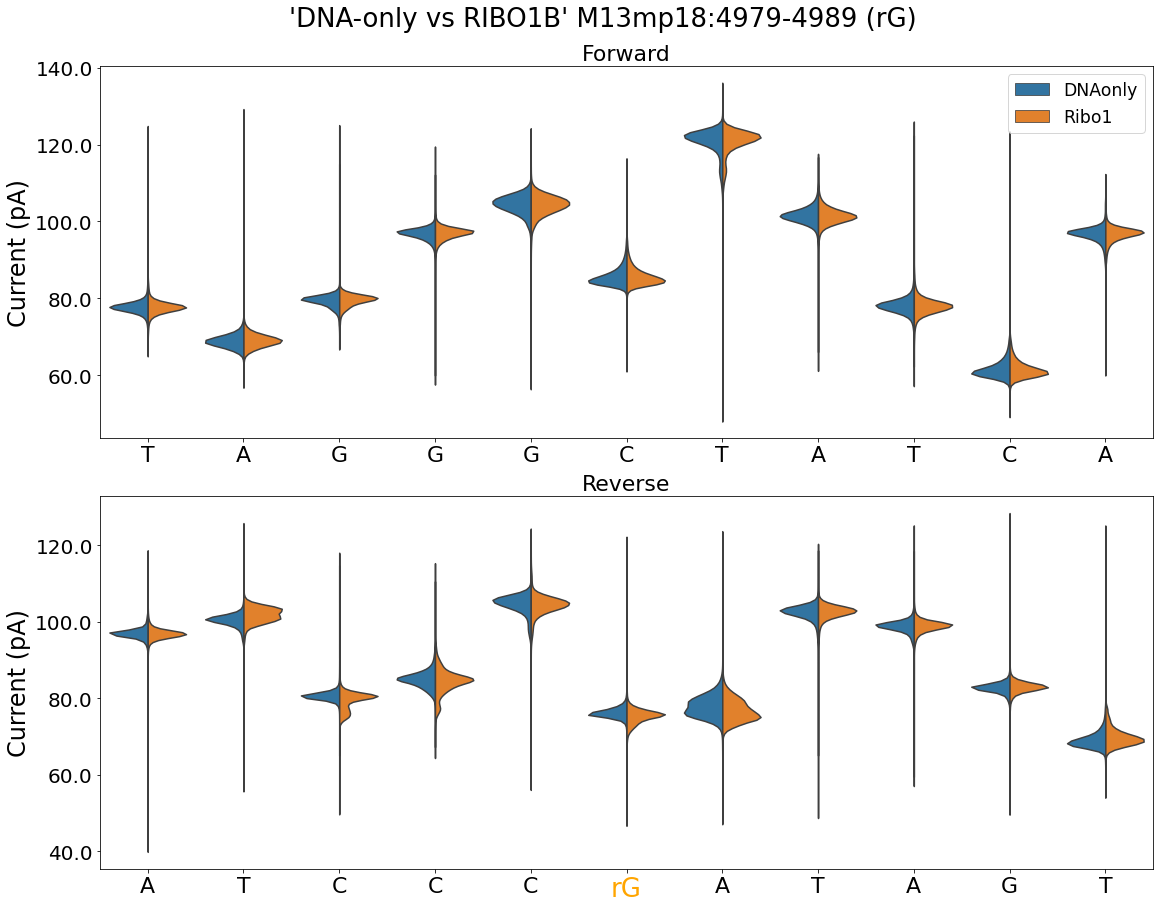

/tmp/ipykernel_6131/574090146.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].yaxis.set_ticklabels(axes[0].get_yticks(), fontsize=20)
/tmp/ipykernel_6131/574090146.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].yaxis.set_ticklabels(axes[1].get_yticks(), fontsize=20)


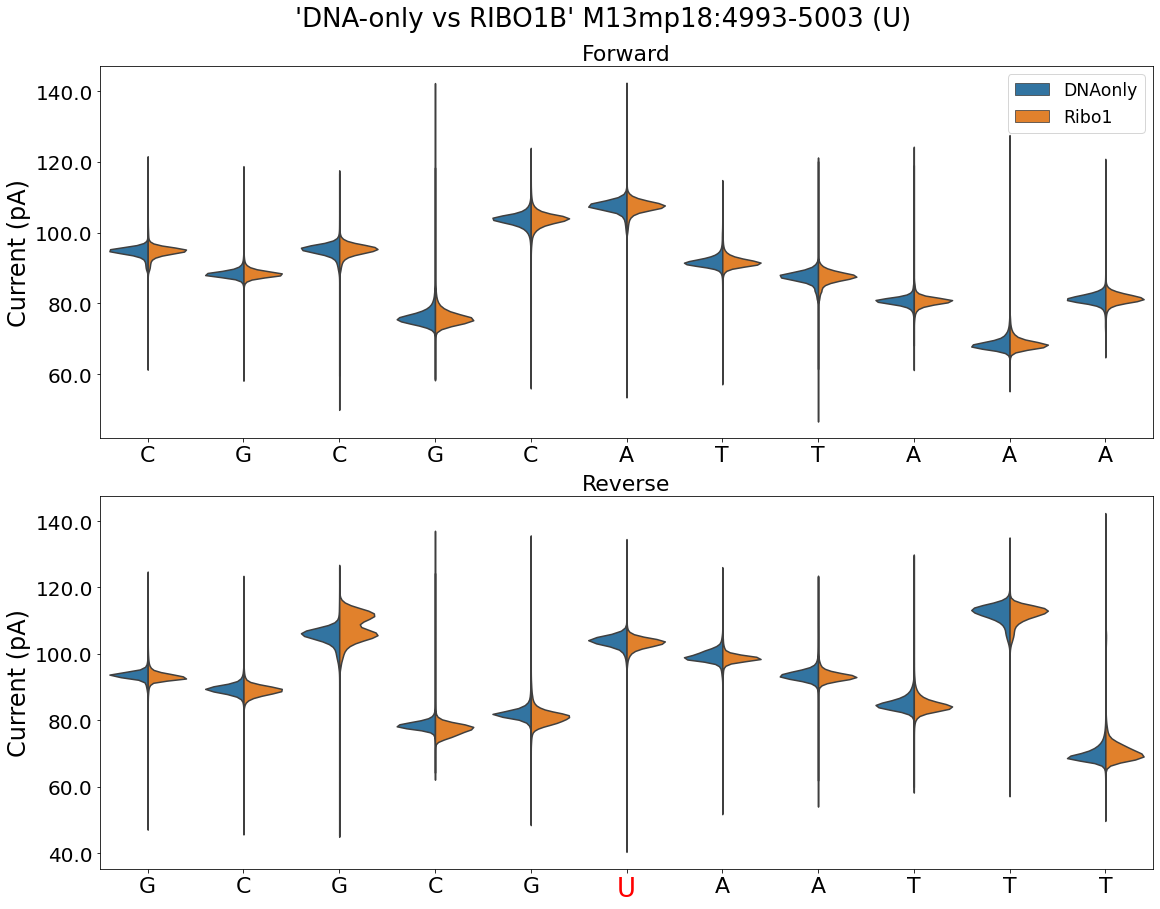

/tmp/ipykernel_6131/574090146.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].yaxis.set_ticklabels(axes[0].get_yticks(), fontsize=20)
/tmp/ipykernel_6131/574090146.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].yaxis.set_ticklabels(axes[1].get_yticks(), fontsize=20)


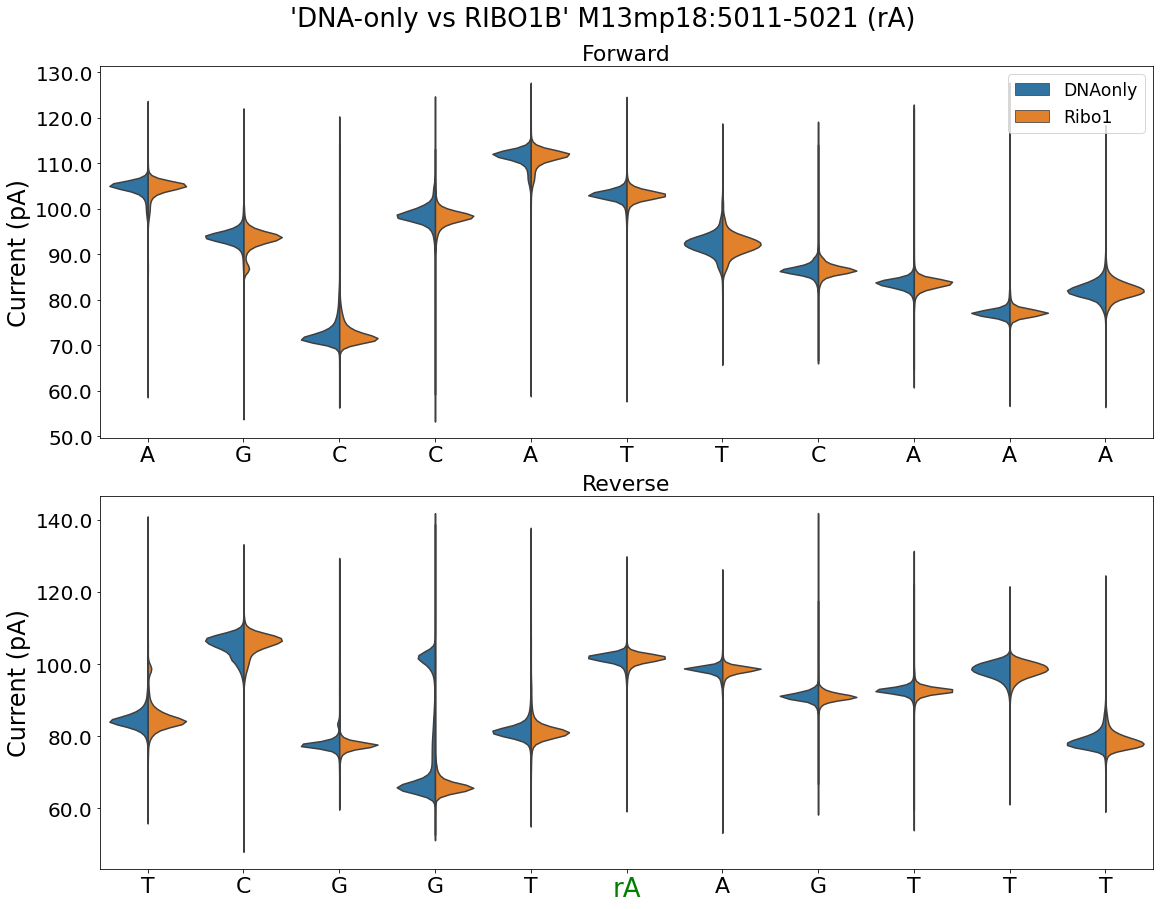

In [9]:
# produce plots
# open reference with pysam as FastaFile object
ref = pysam.FastaFile(reference_filepath)

# define utils function
def get_complement(seq):
    dict_ = {"A":"T", "T":"A", "G":"C", "C":"G"}
    complement = [dict_[base] for base in seq]
    return complement

# produce plots
ribo_sites = [4984, 4998, 5016]
ribo_names = ["rG", "U", "rA"]

# define color code
color_code = {"A":"black", "G":"black", "C":"black", "T":"black", "rA":"green", "rG":"orange", "rC":"blue", "U":"red", "ins":"black", "del":"black"}

for ribo_name,site in zip(ribo_names, ribo_sites):
    start = site - 5
    stop = site + 5

    seq = ref.fetch("M13mp18", start-1, stop)
    seq_rev_compl = get_complement(seq)

    # change reverse central base to ribo
    seq_rev_compl[5] = ribo_name

    f, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12), constrained_layout=True)
    # plot forward
    sn.violinplot(data=df_forward_sample[(df_forward_sample["position"]>=start)&(df_forward_sample["position"]<=stop)], 
                  x="position", y="event_level_mean", hue="y", split=True, scale="width", scale_hue=True, 
                  inner=None, ax=axes[0])
    #axes[0].xaxis.set_tick_params(bottom=False)
    axes[0].set_xlabel("")
    axes[0].set_title("Forward", size=22)
    # plot reverse
    sn.violinplot(data=df_reverse_sample[(df_reverse_sample["position"]>=start)&(df_reverse_sample["position"]<=stop)], 
                  x="position", y="event_level_mean", hue="y", split=True, scale="width", scale_hue=True, 
                  inner=None, ax=axes[1])
    axes[1].set_title("Reverse", size=22)
    f.suptitle(f"'DNA-only vs RIBO1B' M13mp18:{start}-{stop} ({ribo_name})", x=0.52, y=1.04, fontsize=26)
    # change axis titles
    axes[0].set_ylabel("Current (pA)", size=24)
    axes[1].set_ylabel("Current (pA)", size=24)
    axes[1].set_xlabel("", size=18)
    # eliminate legend titles
    axes[0].legend(title="", fontsize="xx-large")
    axes[1].legend(title="", fontsize="xx-large")
    # change y and xticks to reference sequence
    axes[0].set_xticklabels(seq, fontsize=22)
    axes[1].set_xticklabels(seq_rev_compl, fontsize=22)
    axes[0].yaxis.set_ticklabels(axes[0].get_yticks(), fontsize=20)
    axes[1].yaxis.set_ticklabels(axes[1].get_yticks(), fontsize=20)

    # change tick colors and sizes
    my_colors = [color_code[base] for base in seq_rev_compl]
    for ticklabel, tickcolor in zip(axes[1].get_xticklabels(), my_colors):
        ticklabel.set_color(tickcolor)
        if ticklabel.get_text() in ribo_names:
            ticklabel.set_size(26)

    axes[1].legend_ = None
    
    # save image to disk
    plt.savefig(os.path.join(results_directory, f"DNA_vs_RIBO1B_site_M13mp18_{site}.tiff"), 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

    plt.show()
ref.close()

### Plot Dwell times

In [10]:
# downsample for testing
df_forward_sample = df_forward
df_reverse_sample = df_reverse

In [11]:
df_for_dna = df_forward_sample.query("y == 'DNAonly'")
df_for_dna

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,y
0,M13mp18,4965,TAATGG,00001178-3401-4071-b4c2-c6ffe0cc73a8,79.721950,0.794790,4,DNAonly
1,M13mp18,4966,AATGGC,00001178-3401-4071-b4c2-c6ffe0cc73a8,104.032860,3.505903,5,DNAonly
2,M13mp18,4967,ATGGCG,00001178-3401-4071-b4c2-c6ffe0cc73a8,85.566557,0.939262,7,DNAonly
3,M13mp18,4968,TGGCGA,00001178-3401-4071-b4c2-c6ffe0cc73a8,83.073825,1.418365,8,DNAonly
4,M13mp18,4969,GGCGAT,00001178-3401-4071-b4c2-c6ffe0cc73a8,96.164711,1.637071,19,DNAonly
...,...,...,...,...,...,...,...,...
94480719,M13mp18,5030,CTGTGC,fffff161-20a6-4990-a492-97d505732c41,80.086770,3.044081,10,DNAonly
94480720,M13mp18,5031,TGTGCC,fffff161-20a6-4990-a492-97d505732c41,96.808422,3.575080,98,DNAonly
94480721,M13mp18,5032,GTGCCA,fffff161-20a6-4990-a492-97d505732c41,83.077867,1.168871,6,DNAonly
94480722,M13mp18,5033,TGCCAC,fffff161-20a6-4990-a492-97d505732c41,106.952333,1.837364,3,DNAonly


In [12]:
df_for_ribo = df_forward_sample.query("y == 'Ribo1'")
df_for_ribo

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,y
94480724,M13mp18,4965,TAATGG,000004bd-85b6-4e31-baba-91d3c48fdc0b,77.787980,1.103808,5,Ribo1
94480725,M13mp18,4966,AATGGC,000004bd-85b6-4e31-baba-91d3c48fdc0b,101.213800,5.504397,14,Ribo1
94480726,M13mp18,4967,ATGGCG,000004bd-85b6-4e31-baba-91d3c48fdc0b,87.531575,1.720216,4,Ribo1
94480727,M13mp18,4968,TGGCGA,000004bd-85b6-4e31-baba-91d3c48fdc0b,82.567687,1.268666,39,Ribo1
94480728,M13mp18,4969,GGCGAT,000004bd-85b6-4e31-baba-91d3c48fdc0b,94.372080,2.977099,5,Ribo1
...,...,...,...,...,...,...,...,...
182104893,M13mp18,5031,TGTGCC,ffffde40-7452-4f68-88b4-3e740a4c4f6d,96.266697,3.788140,58,Ribo1
182104894,M13mp18,5033,TGCCAC,ffffde40-7452-4f68-88b4-3e740a4c4f6d,105.709444,2.286801,9,Ribo1
182104895,M13mp18,5022,AATATT,fffff06d-afdc-4785-a3b1-86923aa43019,116.305933,4.102538,15,Ribo1
182104896,M13mp18,5022,AATATT,fffff8e8-b570-4616-ba5e-b79ecea56212,107.640250,2.795775,8,Ribo1


In [13]:
df_rev_dna = df_reverse_sample.query("y == 'DNAonly'")
df_rev_dna

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,y
0,M13mp18,4966,AATGGC,00001284-e4aa-409b-80c7-938849a50d2b,93.242812,2.198808,8,DNAonly
1,M13mp18,4967,ATGGCG,00001284-e4aa-409b-80c7-938849a50d2b,105.391791,1.714211,23,DNAonly
2,M13mp18,4968,TGGCGA,00001284-e4aa-409b-80c7-938849a50d2b,85.455380,1.040750,15,DNAonly
3,M13mp18,4969,GGCGAT,00001284-e4aa-409b-80c7-938849a50d2b,94.985440,1.038393,5,DNAonly
4,M13mp18,4970,GCGATG,00001284-e4aa-409b-80c7-938849a50d2b,116.236750,3.864615,8,DNAonly
...,...,...,...,...,...,...,...,...
65412281,M13mp18,5028,GTCTGT,fffffdf6-edc1-4b13-b2b3-0070b1ab5268,83.969104,3.426252,24,DNAonly
65412282,M13mp18,5029,TCTGTG,fffffdf6-edc1-4b13-b2b3-0070b1ab5268,102.364407,4.333921,14,DNAonly
65412283,M13mp18,5030,CTGTGC,fffffdf6-edc1-4b13-b2b3-0070b1ab5268,93.447300,1.345678,11,DNAonly
65412284,M13mp18,5031,TGTGCC,fffffdf6-edc1-4b13-b2b3-0070b1ab5268,96.723417,1.646808,6,DNAonly


In [14]:
df_rev_ribo = df_reverse_sample.query("y == 'Ribo1'")
df_rev_ribo

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,y
65412286,M13mp18,4966,AATGGC,00000469-4a02-408b-8a6a-9a0ca8c94100,92.904871,1.755518,7,Ribo1
65412287,M13mp18,4967,ATGGCG,00000469-4a02-408b-8a6a-9a0ca8c94100,105.526750,2.643100,4,Ribo1
65412288,M13mp18,4968,TGGCGA,00000469-4a02-408b-8a6a-9a0ca8c94100,85.273700,1.298975,7,Ribo1
65412289,M13mp18,4969,GGCGAT,00000469-4a02-408b-8a6a-9a0ca8c94100,96.419173,2.070402,11,Ribo1
65412290,M13mp18,4970,GCGATG,00000469-4a02-408b-8a6a-9a0ca8c94100,114.953500,1.584557,4,Ribo1
...,...,...,...,...,...,...,...,...
137248361,M13mp18,5029,TCTGTG,fffffbce-d7b2-494d-a55d-a5bc26150db1,105.312000,1.643843,14,Ribo1
137248362,M13mp18,5030,CTGTGC,fffffbce-d7b2-494d-a55d-a5bc26150db1,92.851344,1.714427,25,Ribo1
137248363,M13mp18,5031,TGTGCC,fffffbce-d7b2-494d-a55d-a5bc26150db1,93.455090,2.206135,10,Ribo1
137248364,M13mp18,5032,GTGCCA,fffffbce-d7b2-494d-a55d-a5bc26150db1,81.156300,0.720758,10,Ribo1


In [15]:
# calulates forward dwell times stats
df_for_stats = pd.merge(df_for_dna.groupby("position")["dwell"].describe().reset_index(), 
                        df_for_ribo.groupby("position")["dwell"].describe().reset_index(),
                        how="inner", on="position", suffixes=('_dna', '_ribo'))
df_for_stats

,position,count_dna,mean_dna,std_dna,min_dna,25%_dna,50%_dna,75%_dna,max_dna,count_ribo,mean_ribo,std_ribo,min_ribo,25%_ribo,50%_ribo,75%_ribo,max_ribo
0,4965,887333.0,12.440758,35.710553,3.0,6.0,9.0,14.0,6438.0,849627.0,12.319541,30.604224,3.0,6.0,9.0,14.0,6744.0
1,4966,1533177.0,12.620377,38.444678,3.0,6.0,9.0,13.0,9880.0,1439027.0,12.561153,34.518113,3.0,6.0,9.0,14.0,7323.0
2,4967,1551197.0,14.003535,31.944190,3.0,5.0,9.0,16.0,15291.0,1451862.0,14.301987,23.806827,3.0,5.0,9.0,17.0,8260.0
3,4968,1565963.0,26.546967,40.371438,3.0,12.0,20.0,32.0,11649.0,1461482.0,23.667043,34.024646,3.0,11.0,18.0,29.0,13054.0
4,4969,1528811.0,13.210907,27.041810,3.0,6.0,10.0,16.0,10959.0,1434315.0,13.821005,22.680102,3.0,6.0,10.0,16.0,5154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5029,1072998.0,11.456716,14.526815,3.0,5.0,8.0,13.0,2419.0,1016389.0,11.550702,14.304271,3.0,5.0,8.0,13.0,1590.0
65,5030,1084583.0,12.395279,13.088394,3.0,6.0,9.0,15.0,2123.0,1028993.0,12.724848,13.664762,3.0,6.0,9.0,15.0,2267.0
66,5031,943370.0,36.535667,36.195366,3.0,14.0,33.0,50.0,4549.0,893979.0,37.028199,37.195045,3.0,14.0,33.0,51.0,2871.0
67,5032,853323.0,13.728654,13.886966,3.0,5.0,9.0,18.0,2956.0,818110.0,14.345803,14.472377,3.0,5.0,10.0,19.0,1801.0


In [16]:
# calulates reverse dwell times stats
df_rev_stats = pd.merge(df_rev_dna.groupby("position")["dwell"].describe().reset_index(), 
                        df_rev_ribo.groupby("position")["dwell"].describe().reset_index(),
                        how="inner", on="position", suffixes=('_dna', '_ribo'))
df_rev_stats

,position,count_dna,mean_dna,std_dna,min_dna,25%_dna,50%_dna,75%_dna,max_dna,count_ribo,mean_ribo,std_ribo,min_ribo,25%_ribo,50%_ribo,75%_ribo,max_ribo
0,4965,34146.0,14.550196,39.006381,3.0,5.0,8.0,16.0,5700.0,50931.0,15.715870,33.384436,3.0,5.0,9.0,17.0,3083.0
1,4966,1135926.0,10.097335,13.153312,3.0,5.0,8.0,13.0,6988.0,1420942.0,10.232444,10.068714,3.0,5.0,8.0,13.0,5106.0
2,4967,1162890.0,8.810502,18.192917,3.0,4.0,7.0,10.0,8893.0,1457070.0,9.061182,13.988751,3.0,5.0,7.0,11.0,7017.0
3,4968,1197784.0,10.879566,13.289718,3.0,6.0,9.0,13.0,4153.0,1498156.0,11.038799,10.523841,3.0,6.0,9.0,13.0,1863.0
4,4969,1195325.0,10.025447,11.561758,3.0,5.0,8.0,12.0,5910.0,1496949.0,10.349658,12.185779,3.0,5.0,8.0,13.0,6817.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,5029,552280.0,13.416291,24.531519,3.0,6.0,9.0,15.0,2526.0,669945.0,14.416619,29.041943,3.0,6.0,10.0,15.0,2355.0
64,5030,515687.0,17.063350,26.786087,3.0,7.0,13.0,21.0,8445.0,624346.0,18.097587,25.151903,3.0,7.0,13.0,22.0,2041.0
65,5031,548806.0,12.057933,12.970893,3.0,5.0,8.0,15.0,1588.0,665118.0,12.294551,13.839940,3.0,5.0,8.0,15.0,1742.0
66,5032,371389.0,14.951067,21.378584,3.0,8.0,12.0,18.0,5262.0,452668.0,16.243004,22.210312,3.0,8.0,13.0,19.0,2573.0


In [17]:
# save stats to disk
df_for_stats.to_csv(os.path.join(results_directory, "dna_vs_ribo1b_dwell_times_stats.forward.tsv"), sep="\t")
df_rev_stats.to_csv(os.path.join(results_directory, "dna_vs_ribo1b_dwell_times_stats.reverse.tsv"), sep="\t")

In [18]:
# calculate dwell averages forward strand
df_for_dwell_means = pd.merge(df_for_dna.groupby("position")["dwell"].mean().reset_index(), 
                              df_for_ribo.groupby("position")["dwell"].mean().reset_index(),
                              how="inner", on="position", suffixes=('_dna', '_ribo'))
df_for_dwell_means["delta"] = df_for_dwell_means["dwell_ribo"] - df_for_dwell_means["dwell_dna"]
df_for_dwell_means

,position,dwell_dna,dwell_ribo,delta
0,4965,12.440758,12.319541,-0.121216
1,4966,12.620377,12.561153,-0.059224
2,4967,14.003535,14.301987,0.298452
3,4968,26.546967,23.667043,-2.879924
4,4969,13.210907,13.821005,0.610098
...,...,...,...,...
64,5029,11.456716,11.550702,0.093986
65,5030,12.395279,12.724848,0.329569
66,5031,36.535667,37.028199,0.492532
67,5032,13.728654,14.345803,0.617149


In [19]:
# calculate dwell averages reverse strand
df_rev_dwell_means = pd.merge(df_rev_dna.groupby("position")["dwell"].mean().reset_index(), 
                              df_rev_ribo.groupby("position")["dwell"].mean().reset_index(),
                              how="inner", on="position", suffixes=('_dna', '_ribo'))
df_rev_dwell_means["delta"] = df_rev_dwell_means["dwell_ribo"] - df_rev_dwell_means["dwell_dna"]
df_rev_dwell_means

,position,dwell_dna,dwell_ribo,delta
0,4965,14.550196,15.715870,1.165674
1,4966,10.097335,10.232444,0.135110
2,4967,8.810502,9.061182,0.250679
3,4968,10.879566,11.038799,0.159233
4,4969,10.025447,10.349658,0.324210
...,...,...,...,...
63,5029,13.416291,14.416619,1.000329
64,5030,17.063350,18.097587,1.034236
65,5031,12.057933,12.294551,0.236618
66,5032,14.951067,16.243004,1.291936


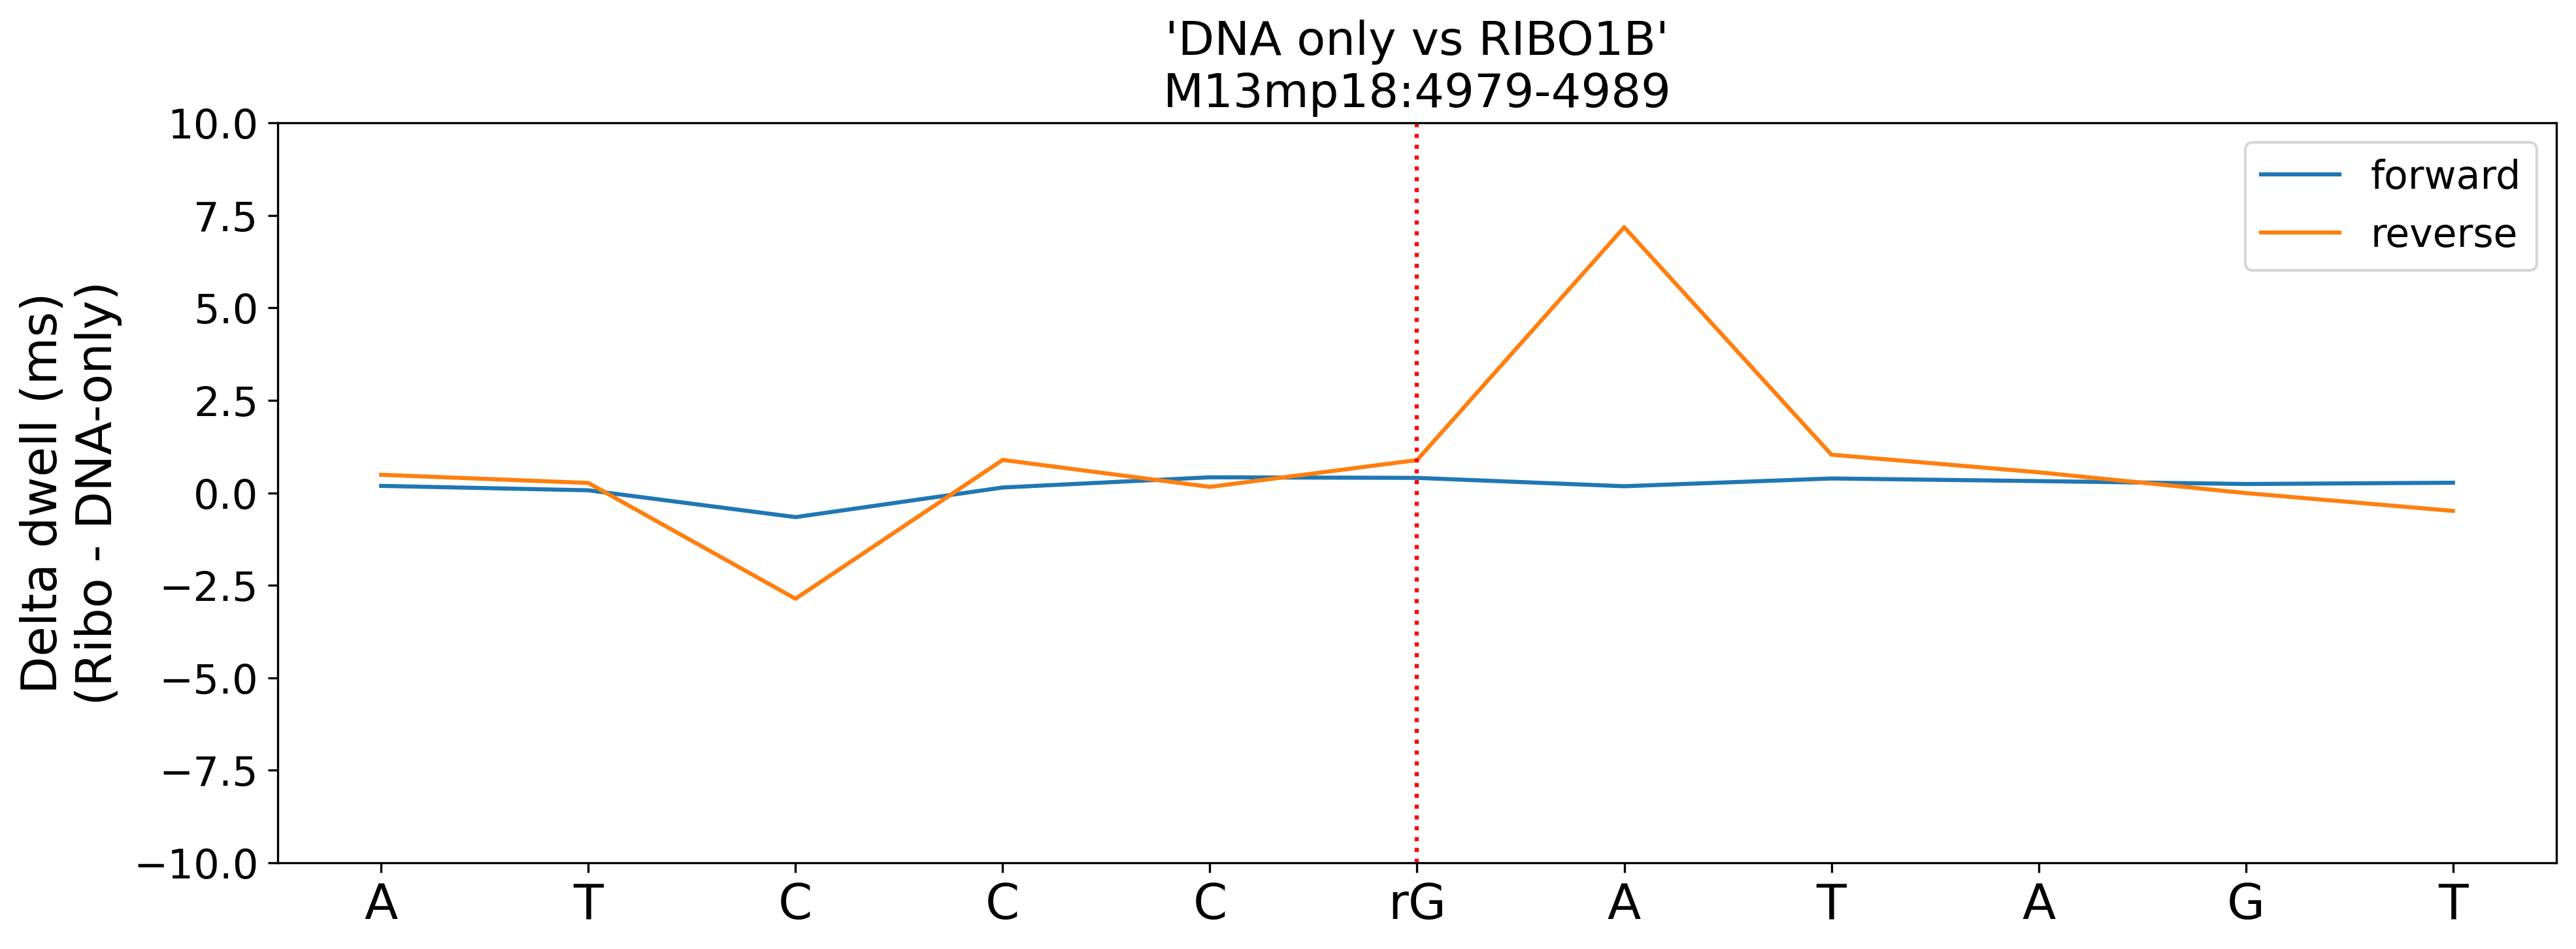

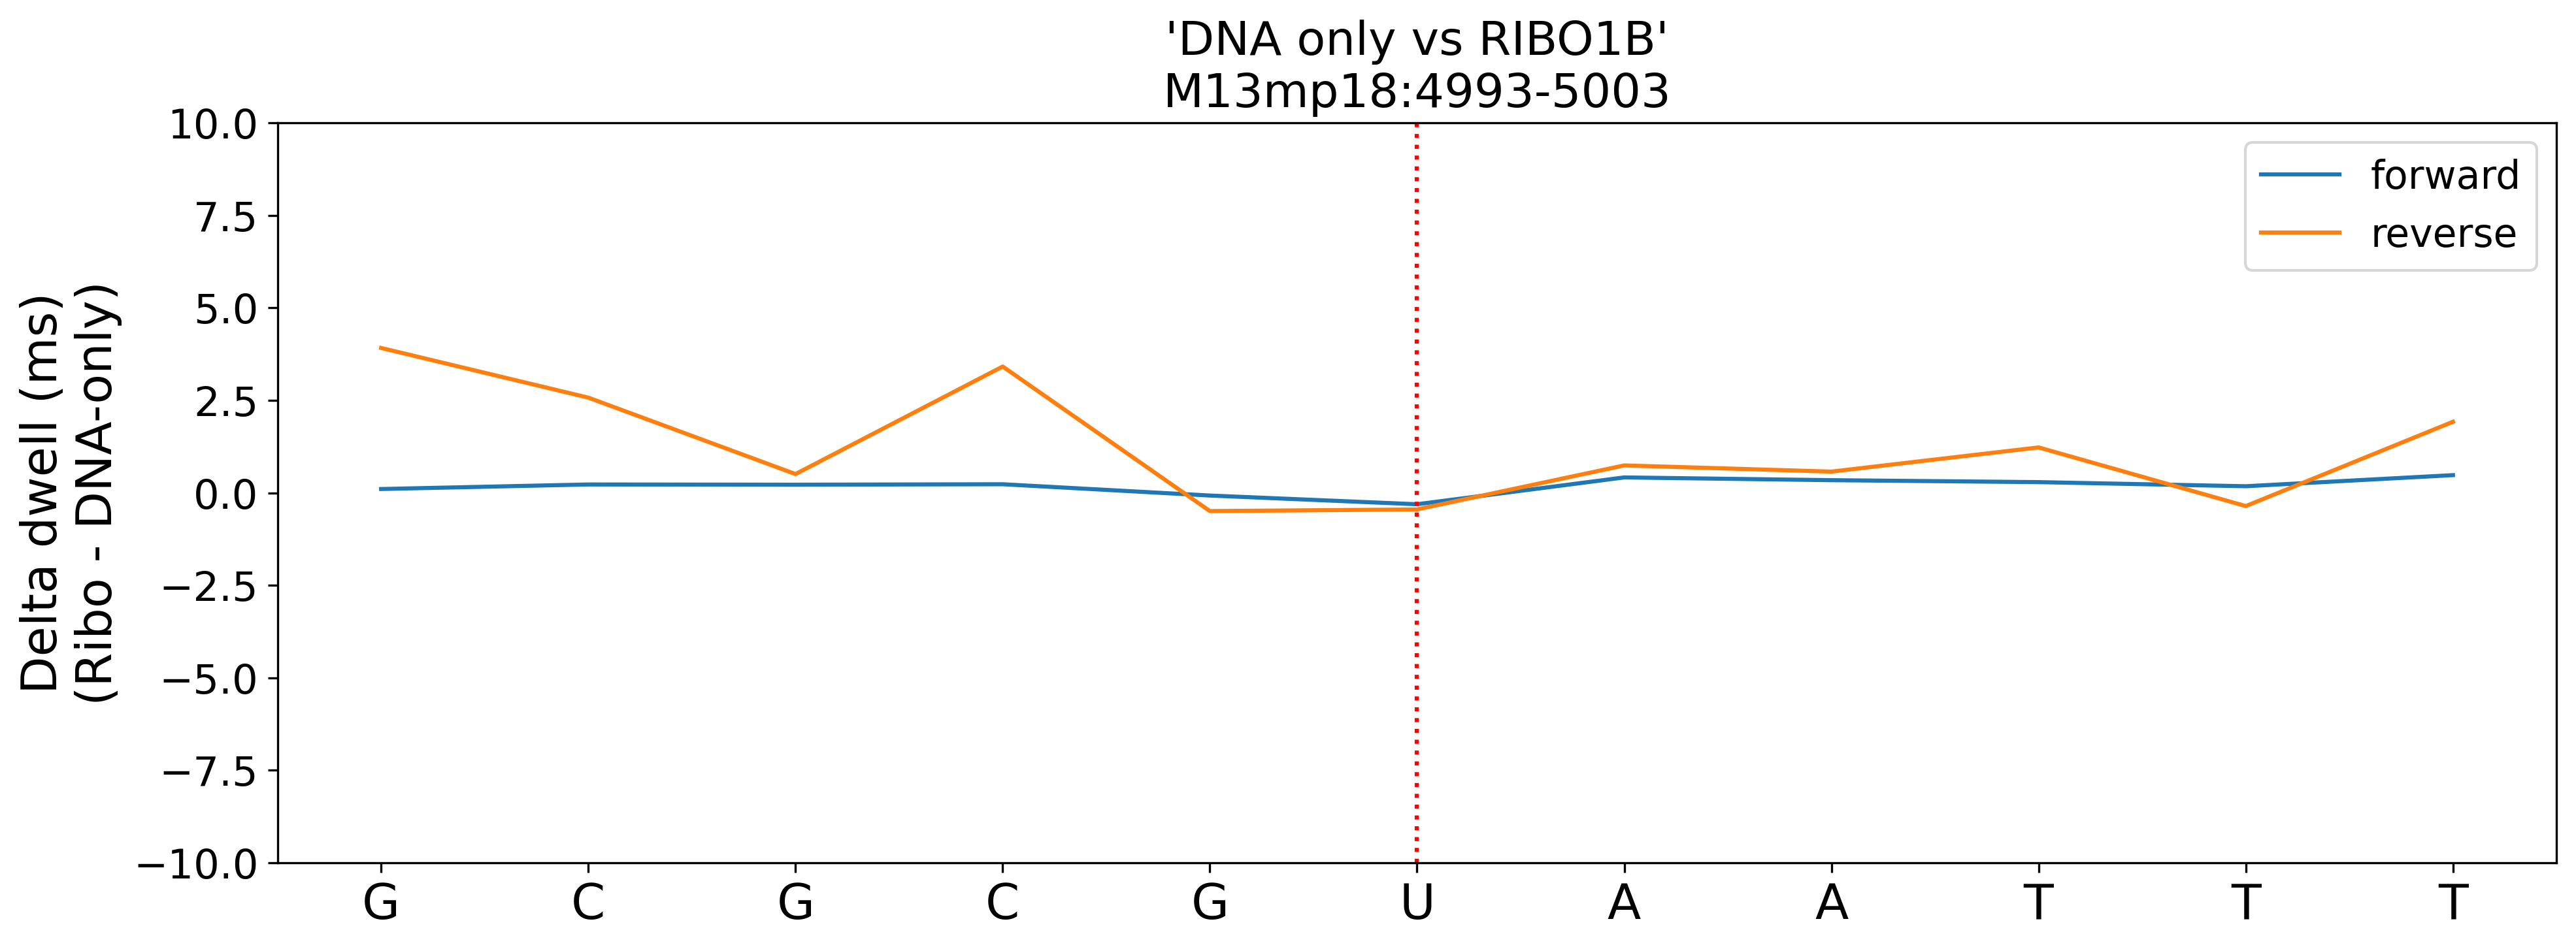

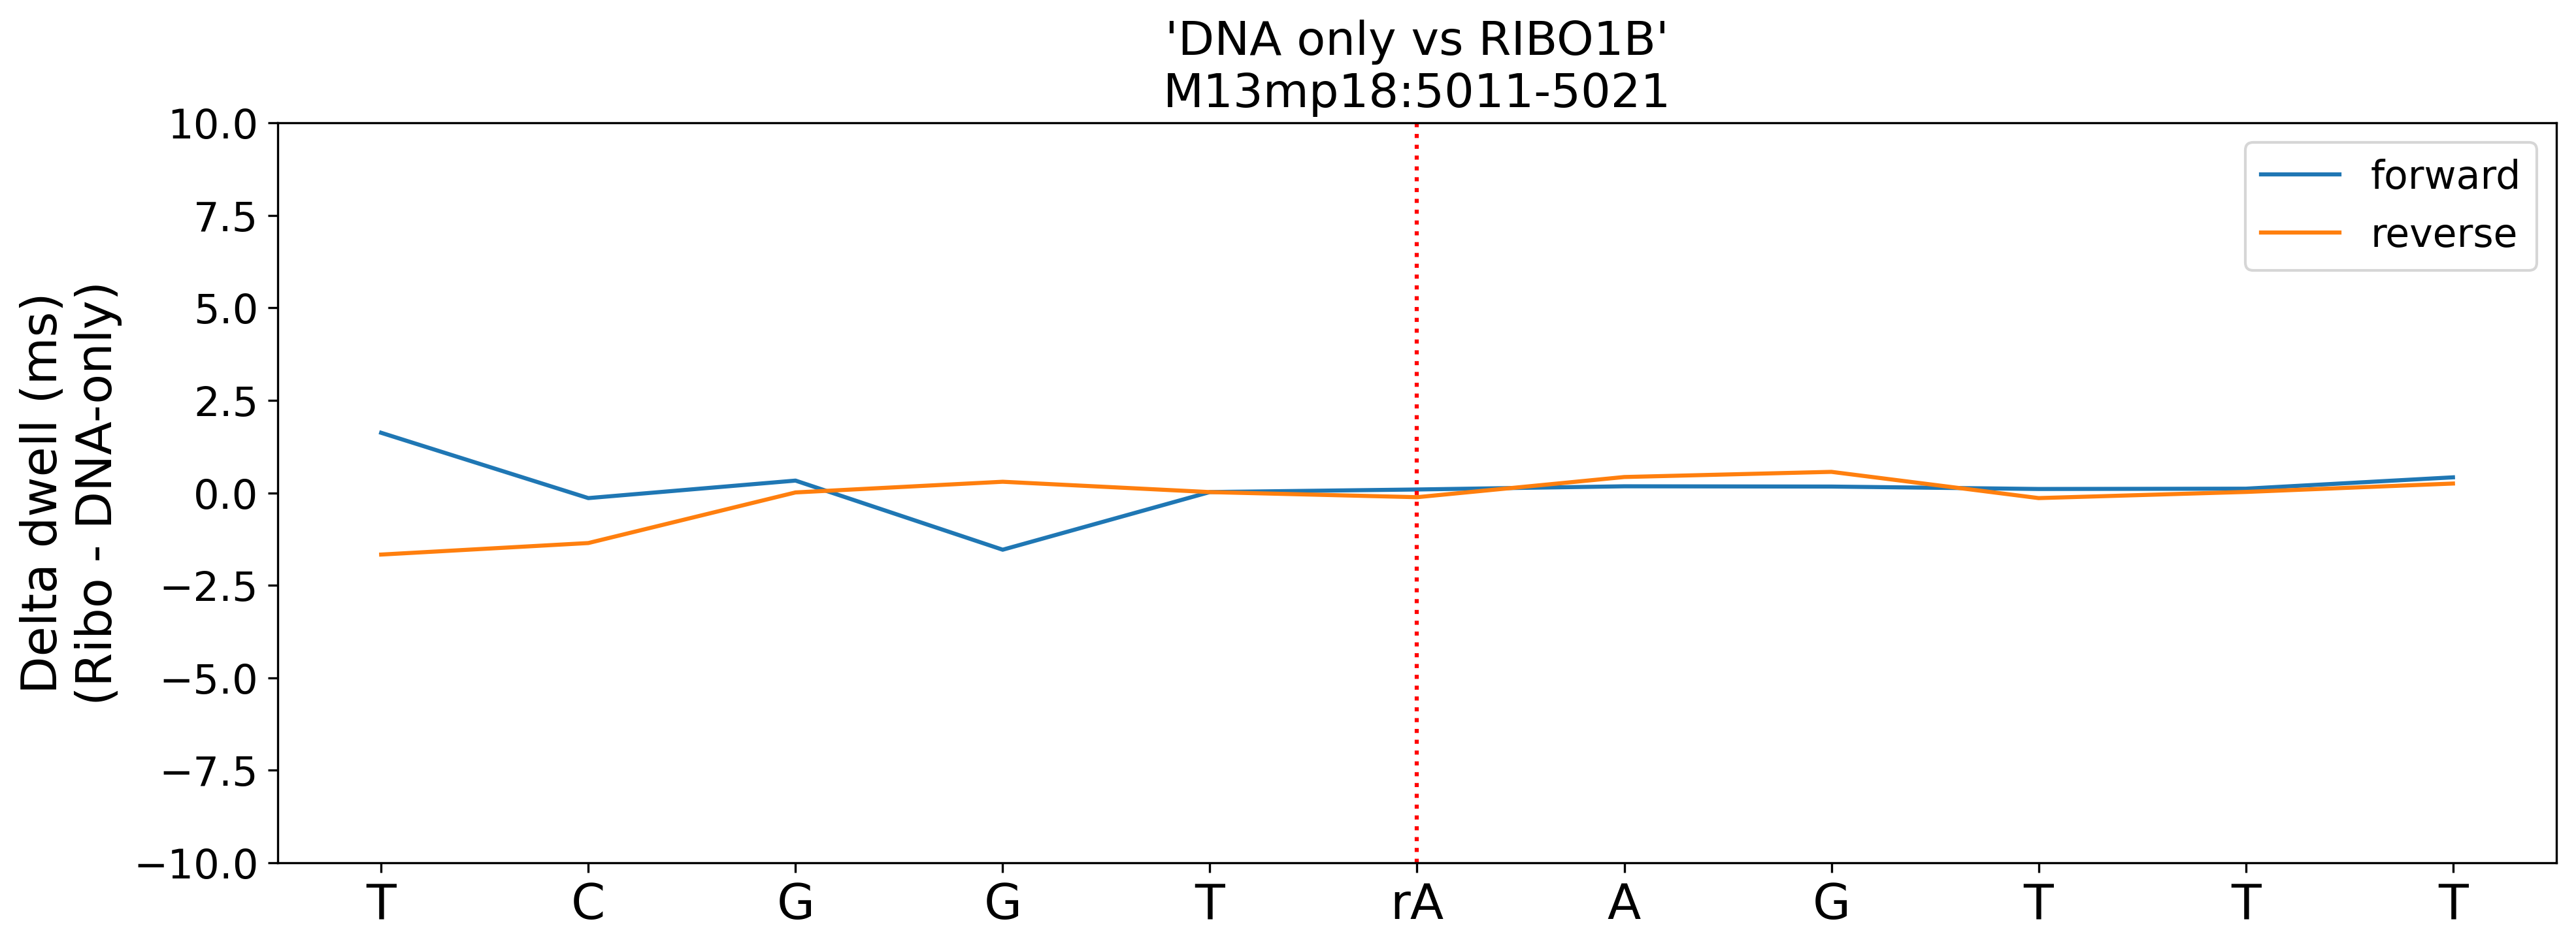

In [20]:
# open reference with pysam as FastaFile object
ref = pysam.FastaFile(reference_filepath)

# plot for each site
for ribo_name,site in zip(ribo_names, ribo_sites):
    start = site - 5
    stop = site + 5

    seq = ref.fetch("M13mp18", start-1, stop)
    seq_rev_compl = get_complement(seq)

    # change reverse central base to ribo
    seq_rev_compl[5] = ribo_name
    # focus region of interst
    forw = df_for_dwell_means.query(f"position >= {start} and position <= {stop}")
    rev = df_rev_dwell_means.query(f"position >= {start} and position <= {stop}")
    title = f"'DNA only vs RIBO1B'"
    suptitle = f"M13mp18:{start}-{stop}"
    f = plt.figure(figsize=(15,5), dpi=300)
    plt.plot(forw["position"], forw["delta"], label="forward")
    plt.plot(rev["position"], rev["delta"], label="reverse")
    plt.legend()
    plt.title(title + "\n" + suptitle, fontsize="xx-large")
    y_lim_min = min(forw.delta.min(), rev.delta.min()) * 1.3
    y_lim_max = max(forw.delta.max(), rev.delta.max()) * 1.3
    if y_lim_max < 10:
        y_lim_max = 10
    if y_lim_min > -10:
        y_lim_min = -10
    plt.ylim(y_lim_min, y_lim_max)
    plt.xticks(np.arange(forw.position.min(), forw.position.max()+1,1), seq_rev_compl, fontsize=18)
    plt.yticks(fontsize=15)
    plt.vlines(site, y_lim_min, y_lim_max, linestyles="dotted", color="red")
    #plt.xlabel("Reference Position", size=14)
    plt.ylabel("Delta dwell (ms)\n(Ribo - DNA-only)", size=18)
    plt.legend(fontsize="x-large")
    
    # save image to disk
    plt.savefig(os.path.join(results_directory, f"DNA_vs_RIBO1B_site_M13mp18_{site}.dwell_times.tiff"), 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()
ref.close()